In [1]:
# Required library installations (uncomment these lines if running in a new environment)
!pip install pandas transformers torch evaluate bert-score nltk textstat rouge_score nltk tabulate groq openpyxl google-generativeai fpdf

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processing JSON file...
--------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------
JSON Data Extracted Successfully for Input Data - 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
**Preconditions:**
    - Instructor is logged in
    - A live session is scheduled and started
**Test Data:** No test data needed
**Test Steps:** 
**Postconditions:** 
**Expected Result:** 
**Severity:** Major
**Type of Testing:** Functional
**Test Case Approach:** Positive


**Test Case 1:**

**Test Case ID:** TC_ATT_01
**Test Case Title:** Verify that attendance is automatically recorded during live sessions.
**Test Case Description:** This test case verifies that the system automatically records attendance for learners who join a live session. The test checks if the system accurately captures the entry and exit timestamps for each participant. 
**Test Steps:**
    1. As an instructor, start a live session.
    2. As a learner, join the live session.
    3. Stay in the session for a few minutes, then leave the session.
    4. As an instructor, end the session.
**Postconditions:**
    - The session is ended.
**Expected Result:** The s

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


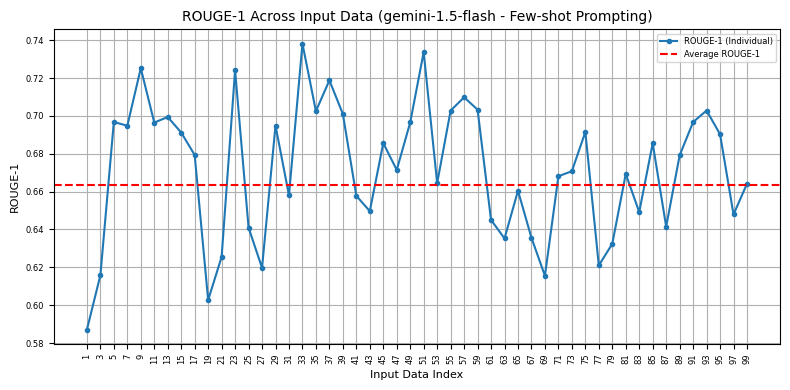

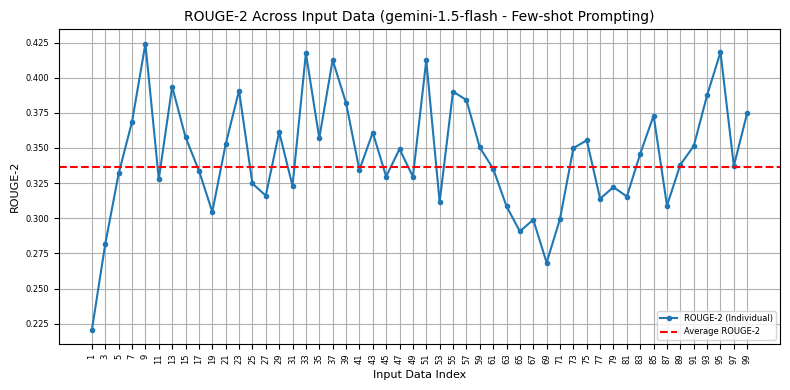

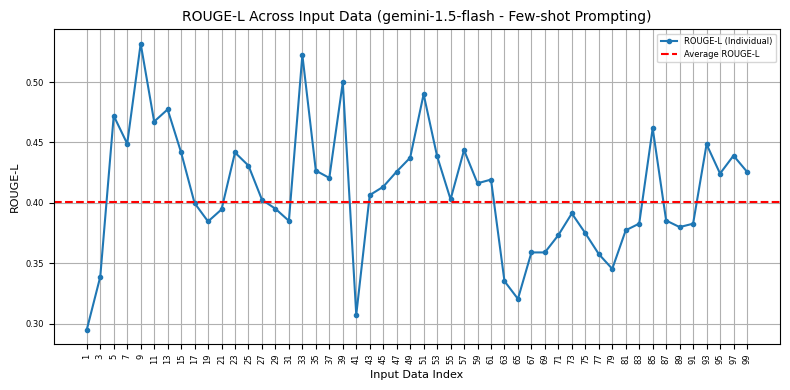

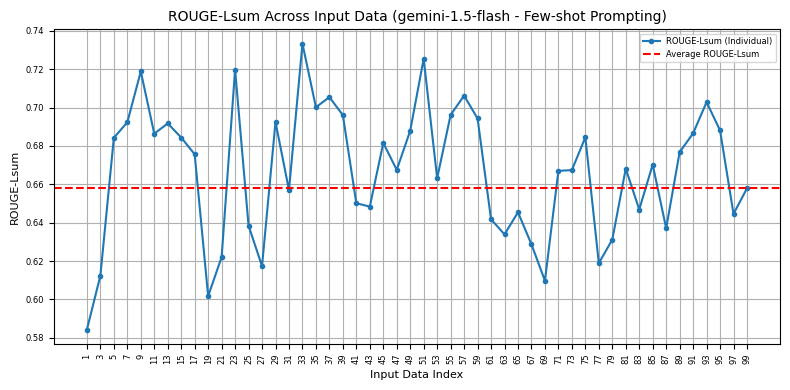

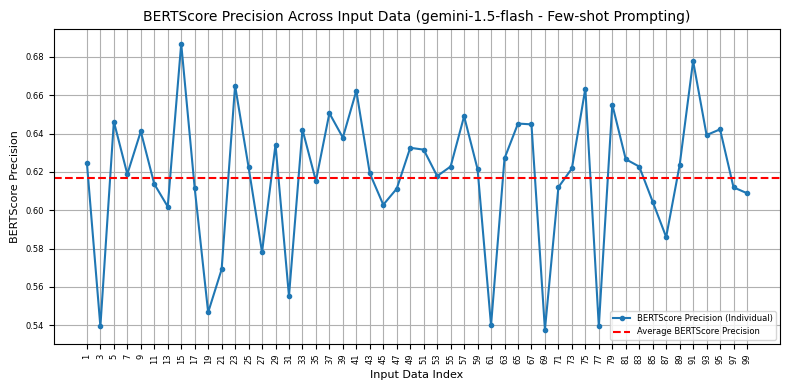

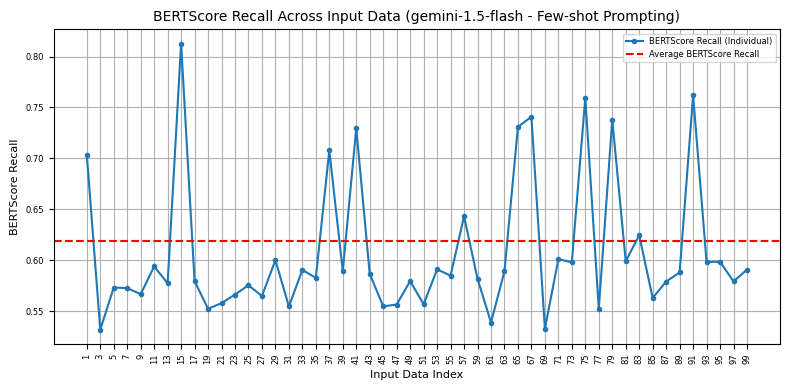

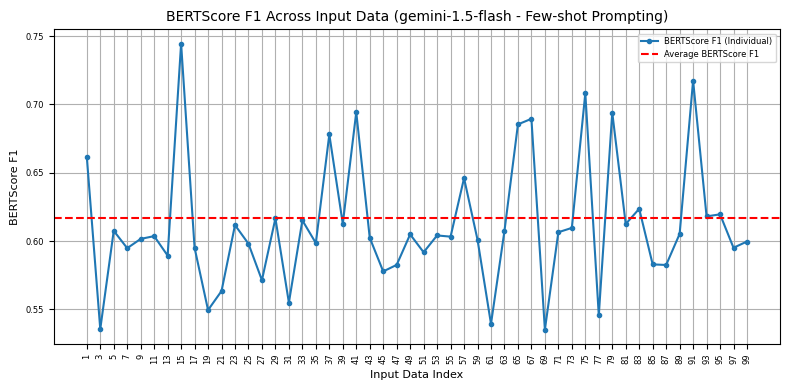

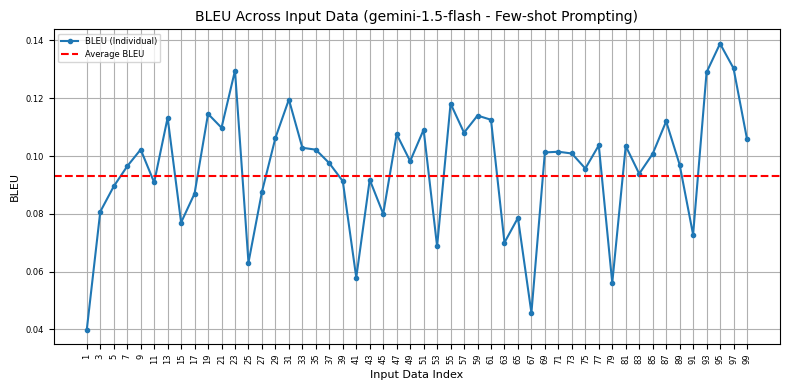

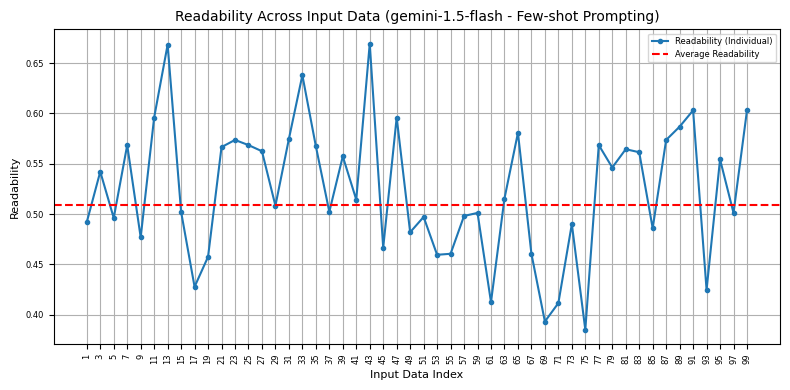

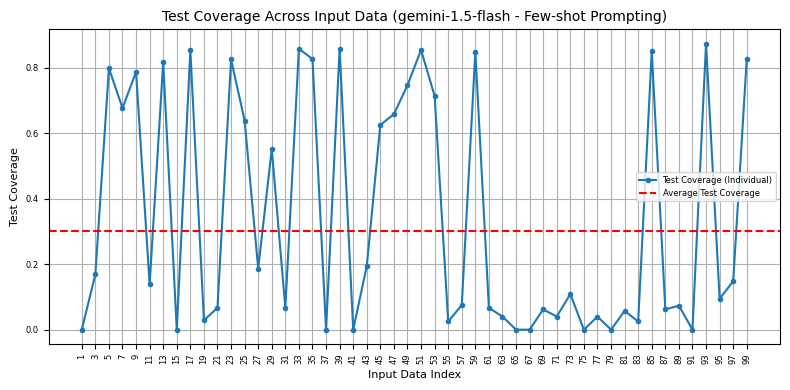

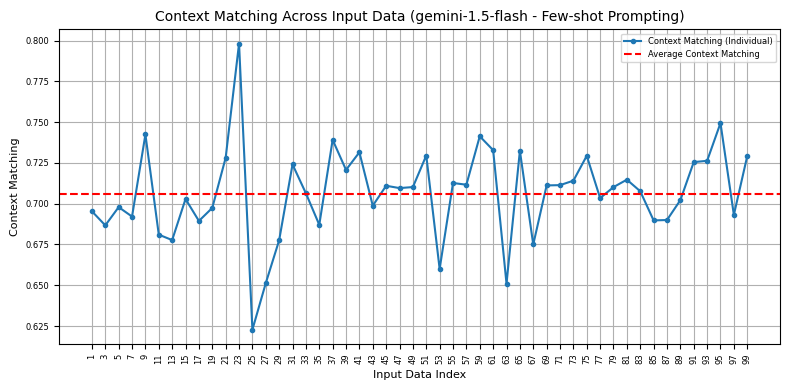

All metrics plotted and saved in images-BAK3L1


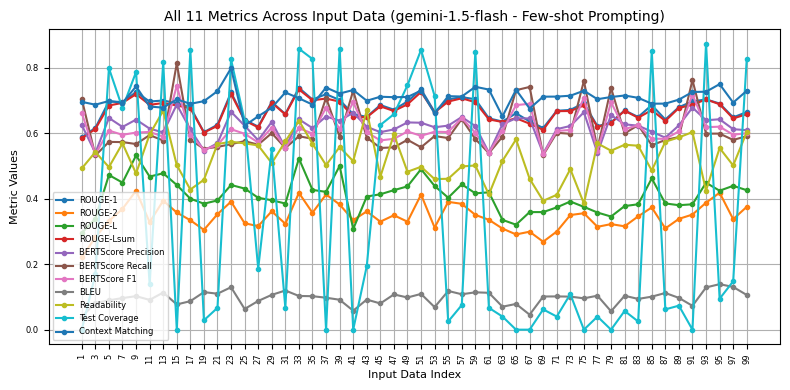

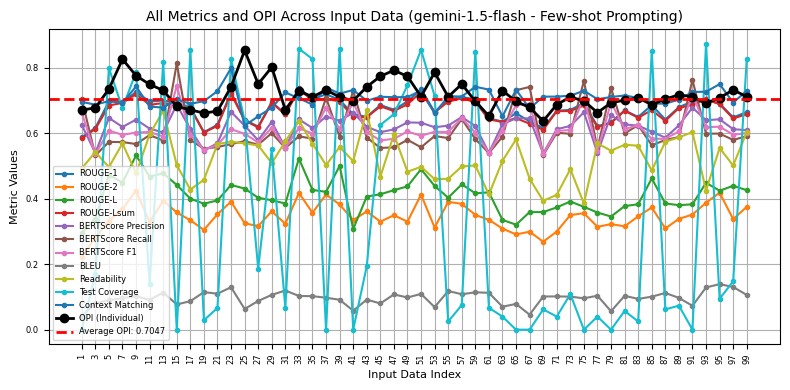

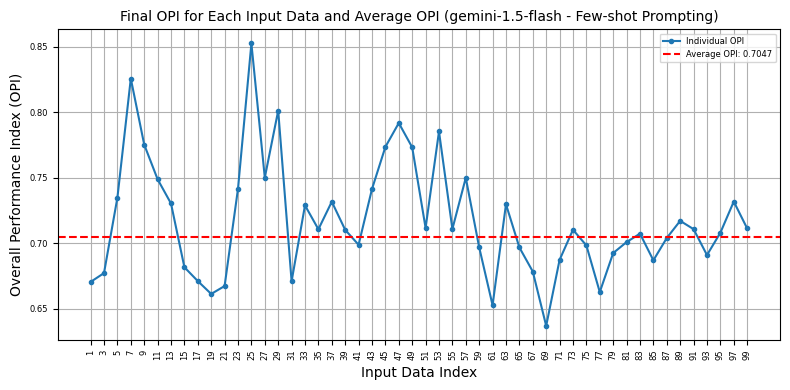

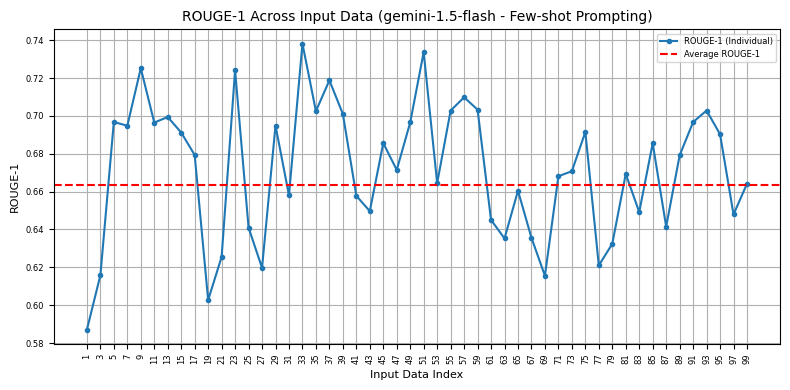

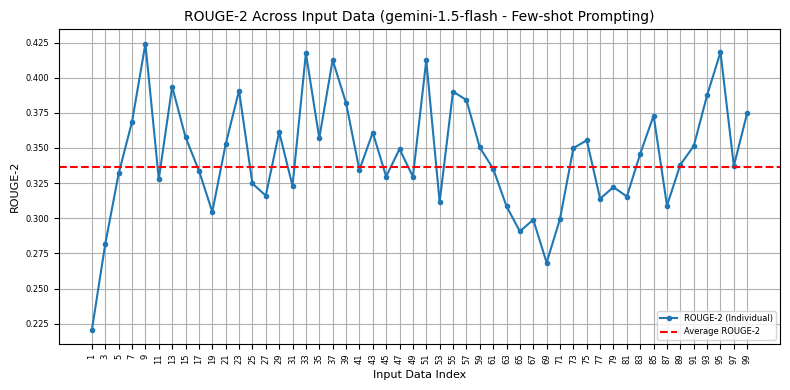

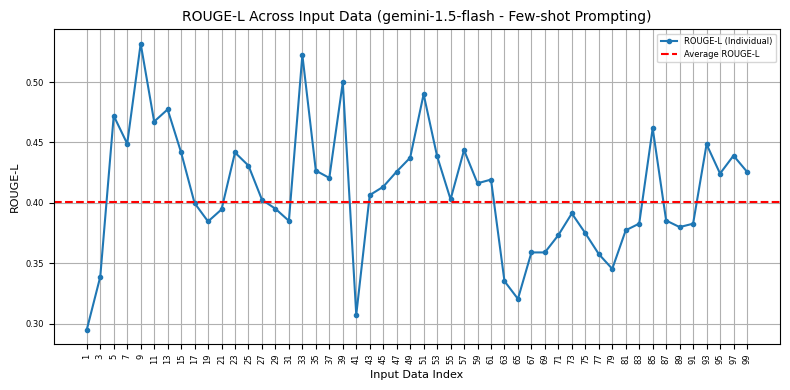

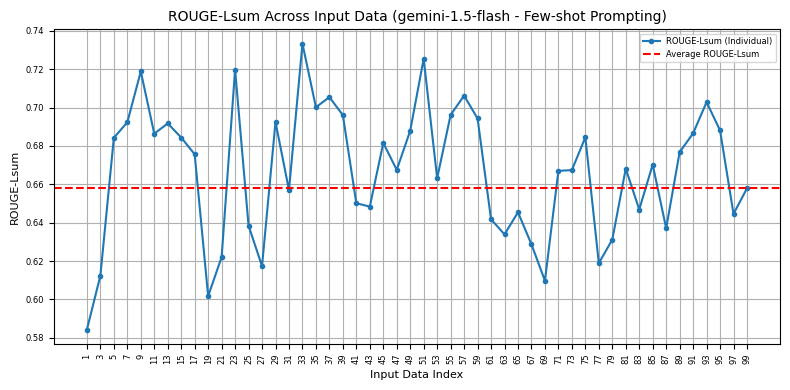

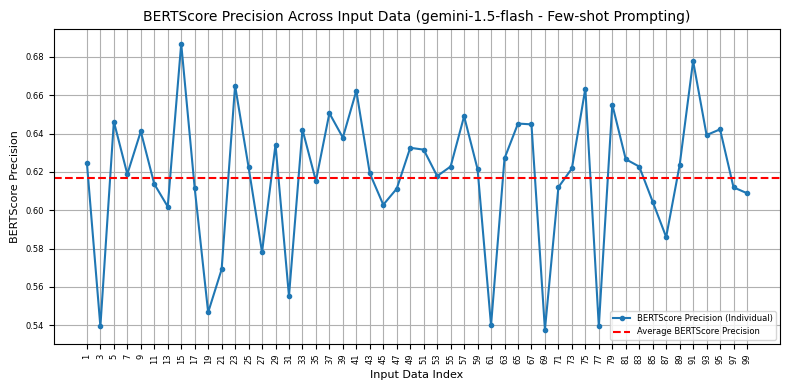

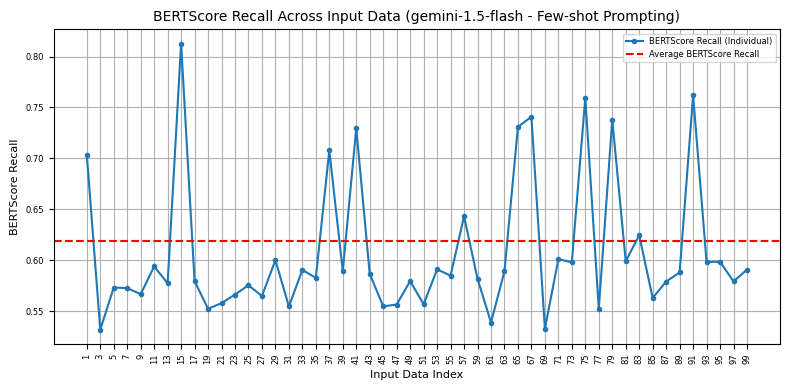

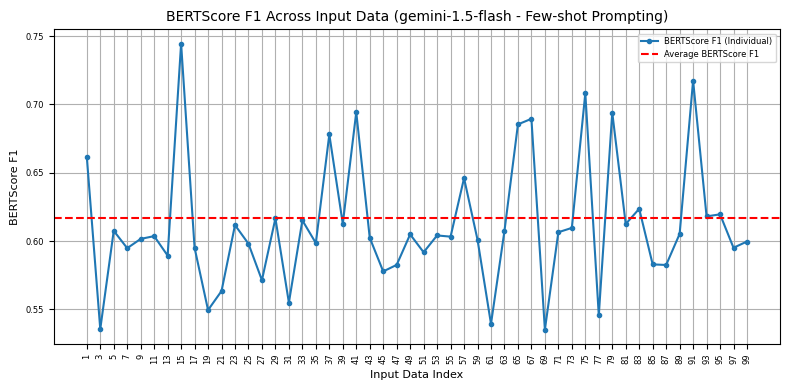

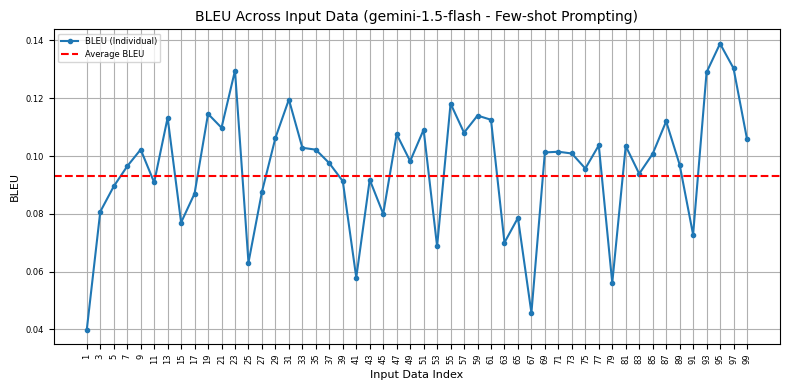

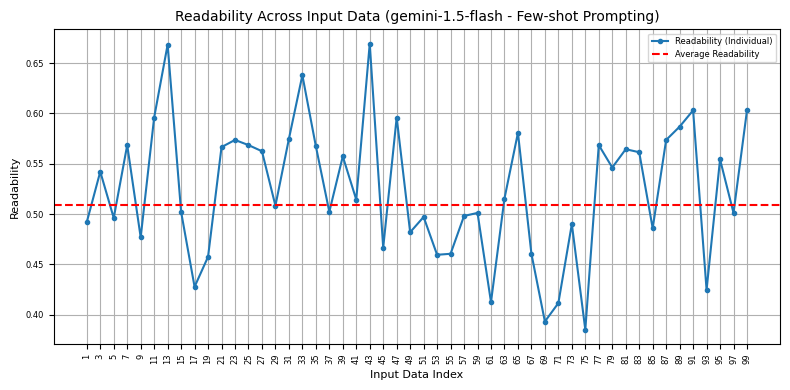

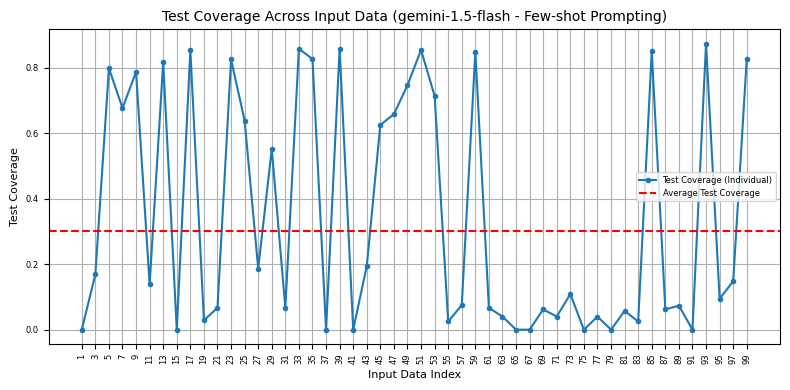

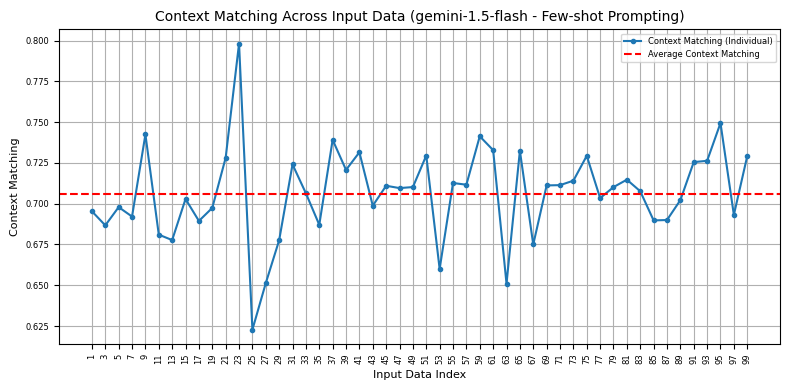

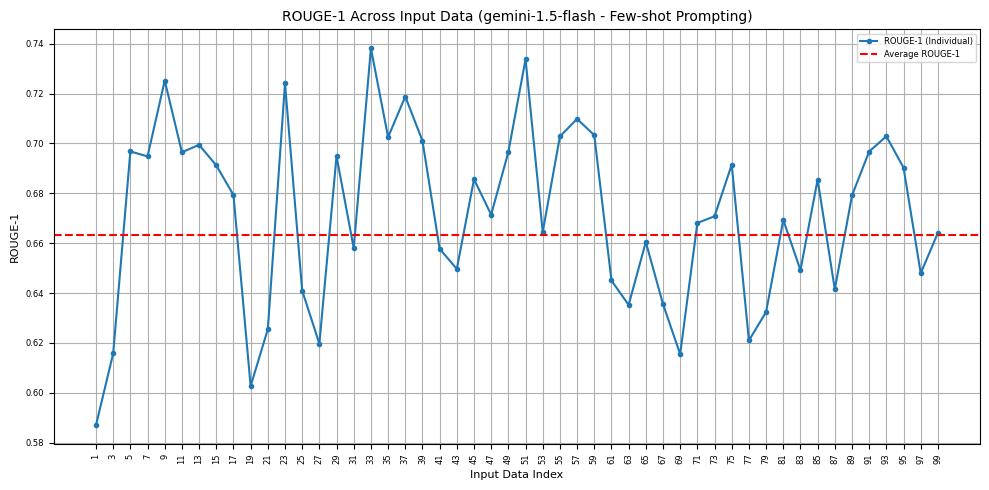

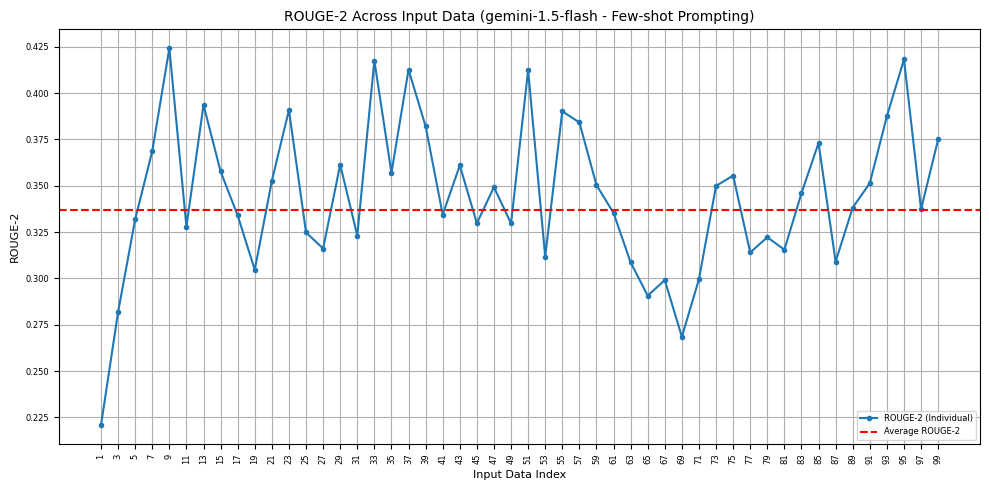

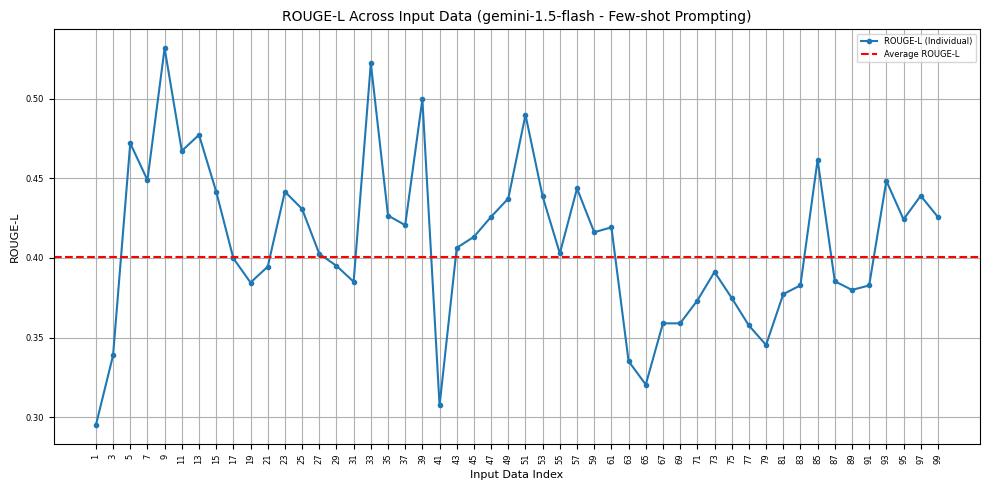

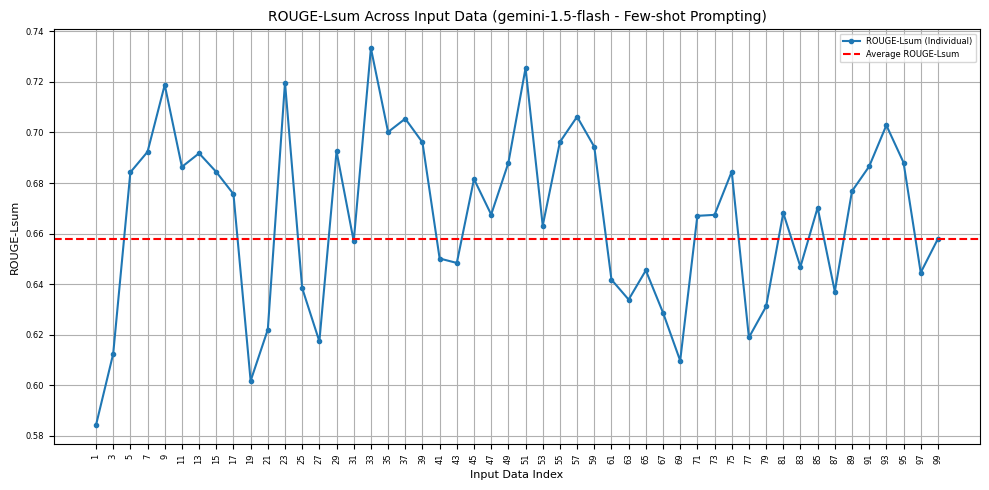

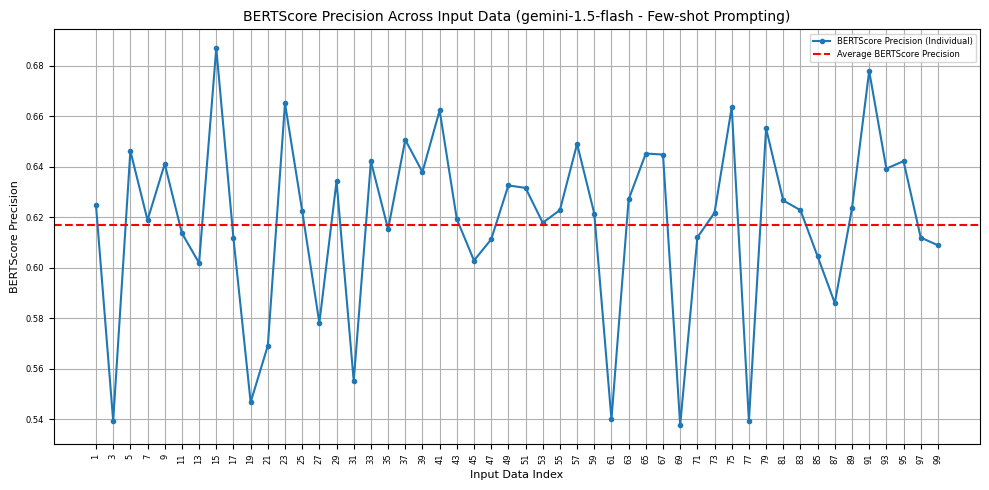

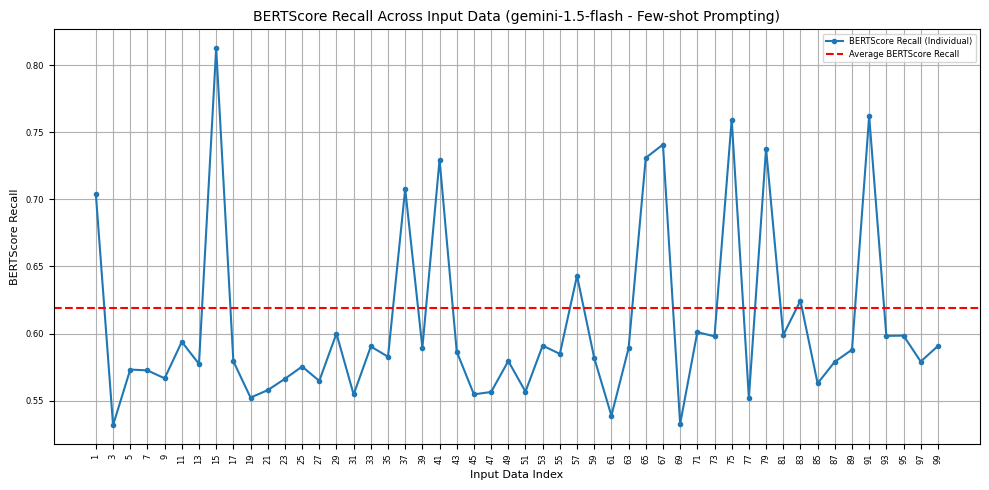

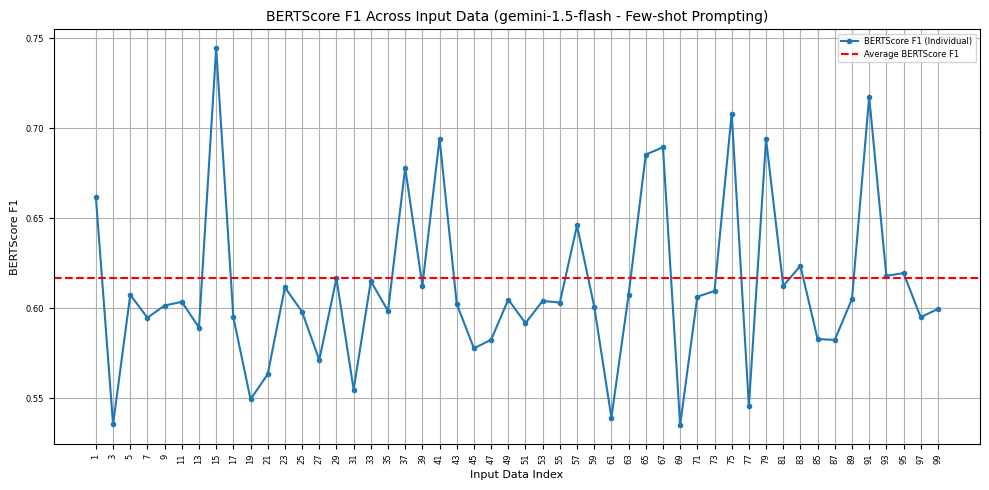

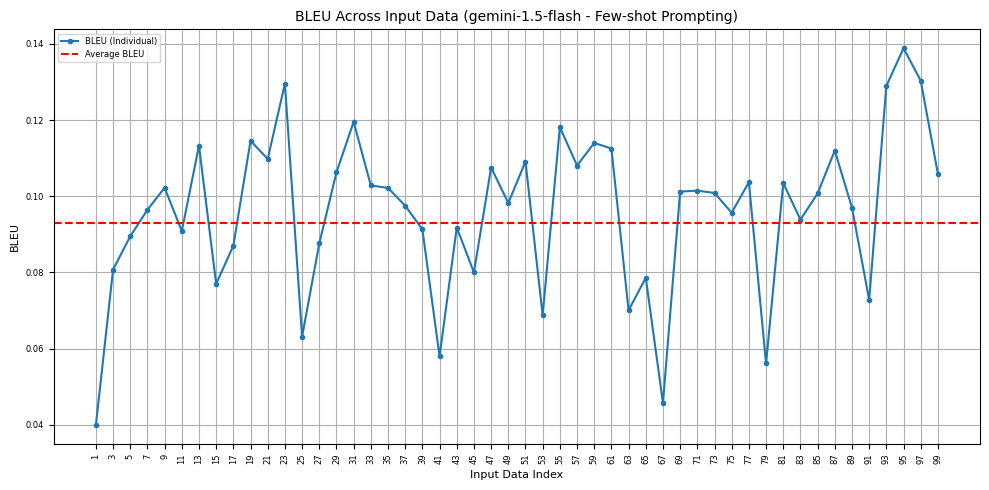

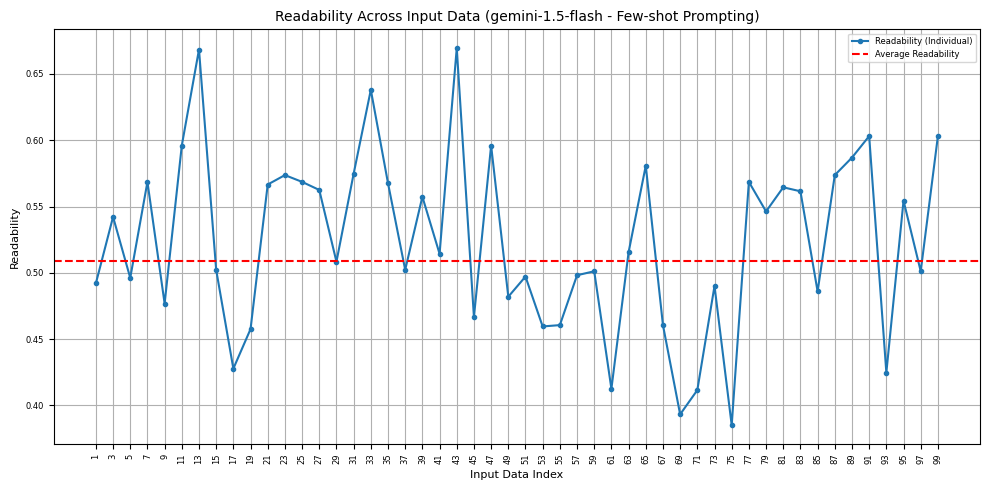

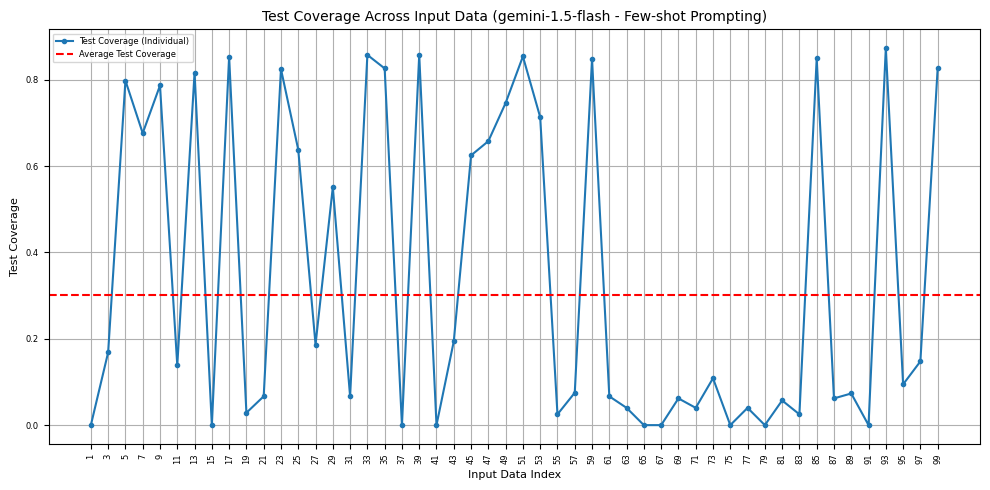

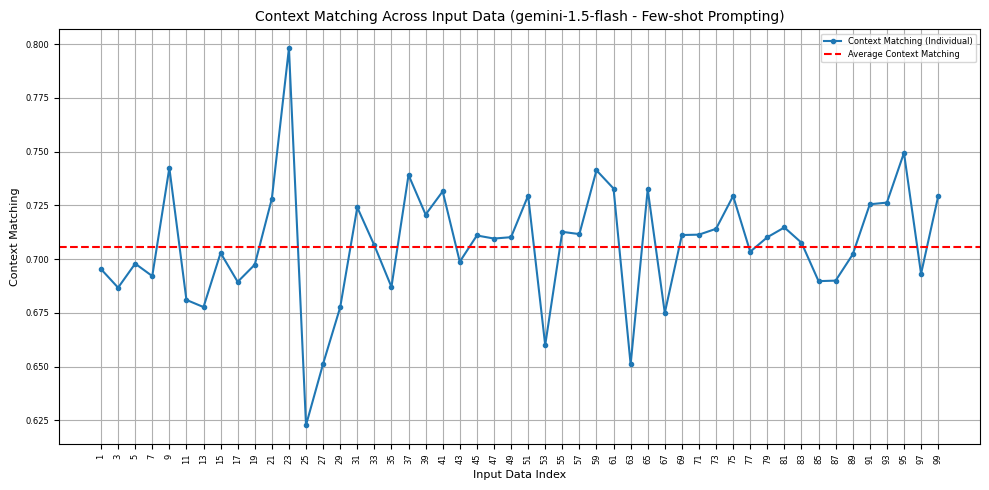

All metrics plotted and saved in images-BAK3L1


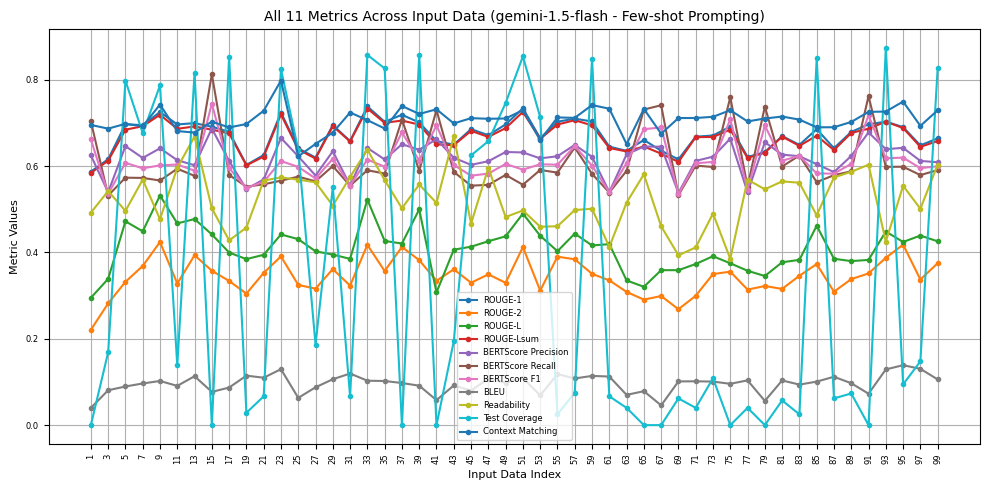

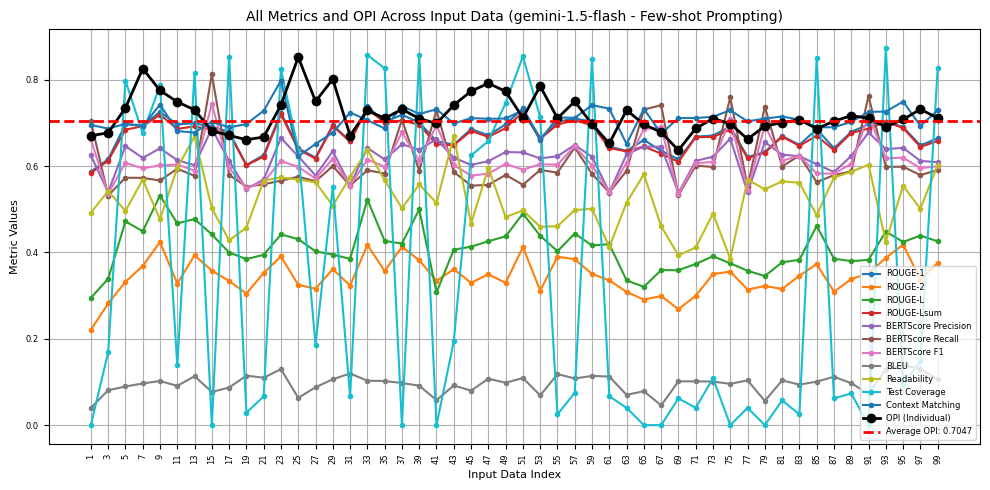

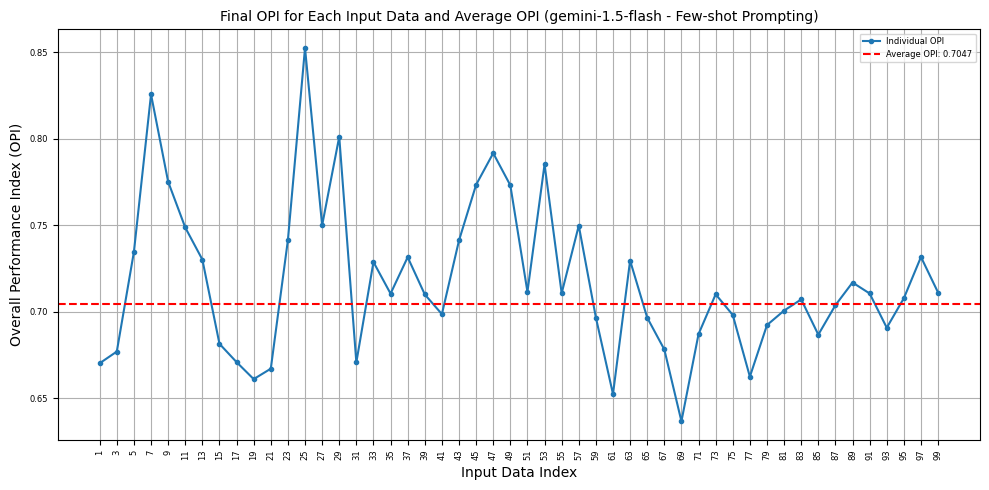

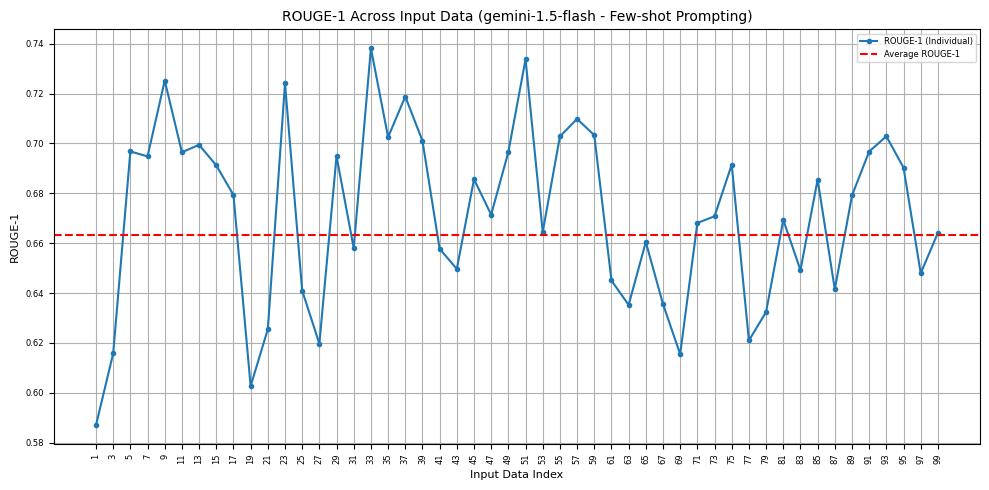

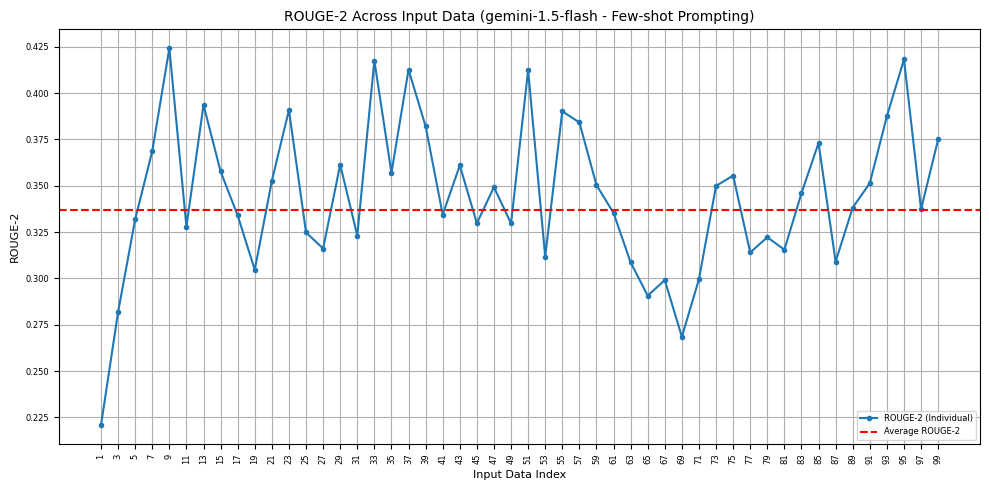

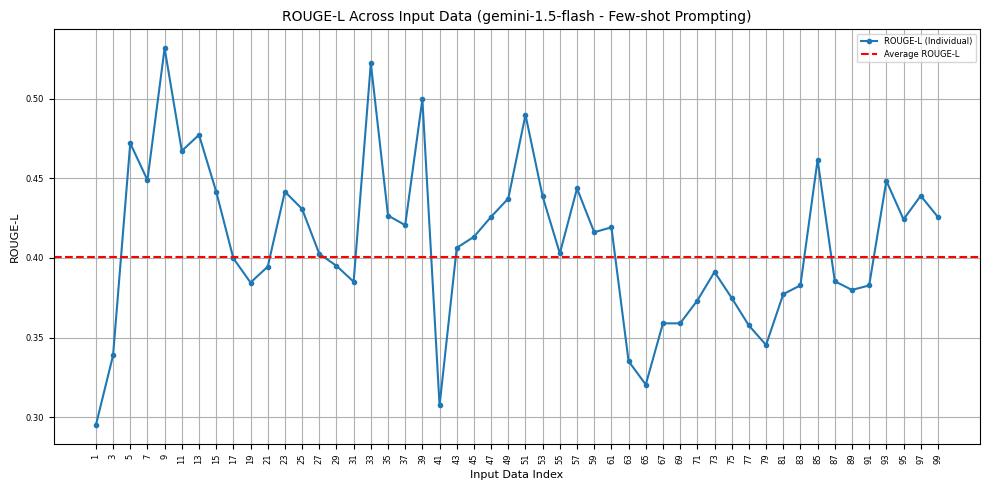

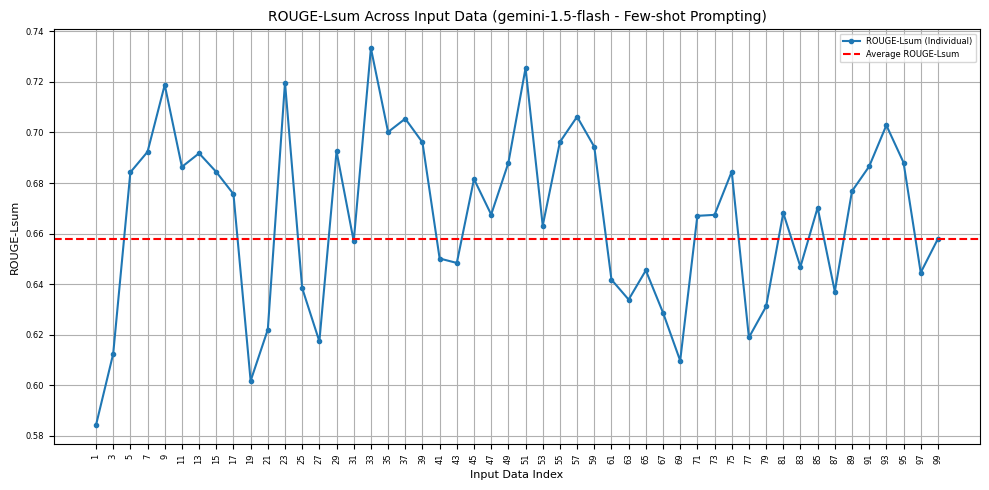

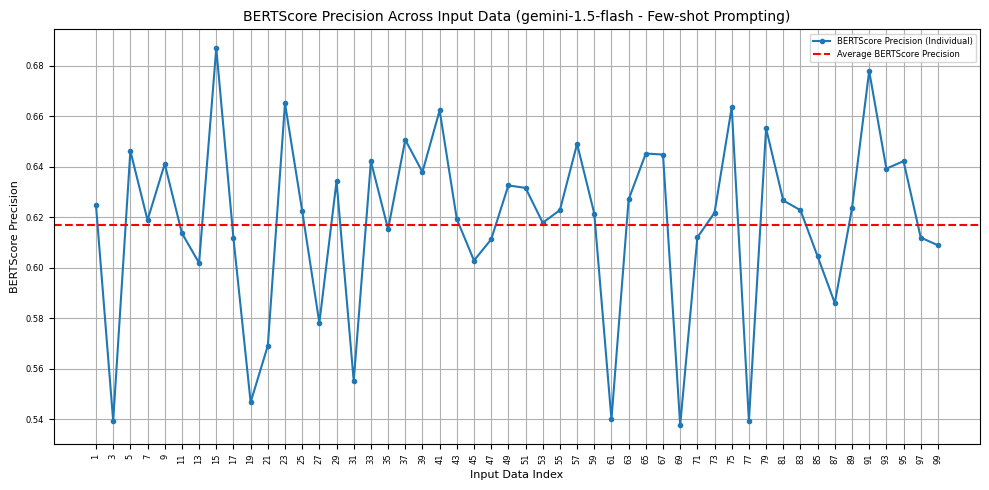

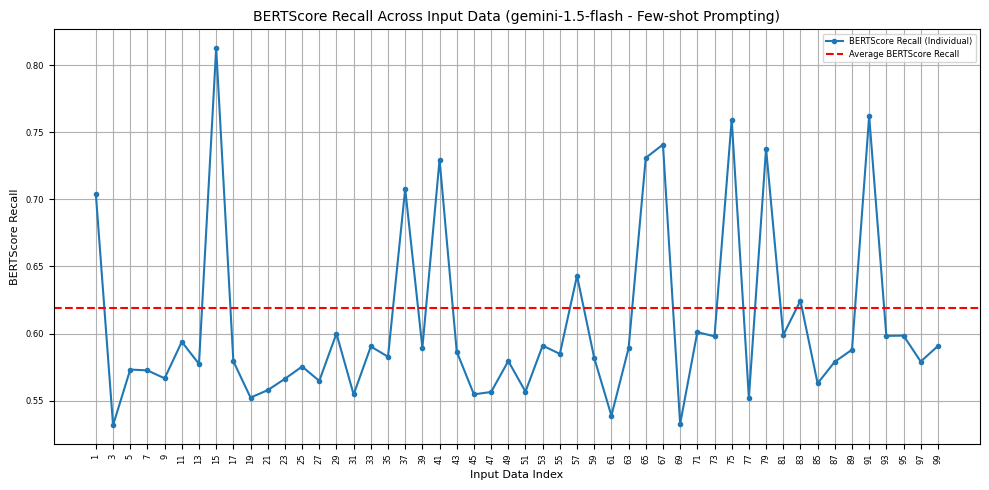

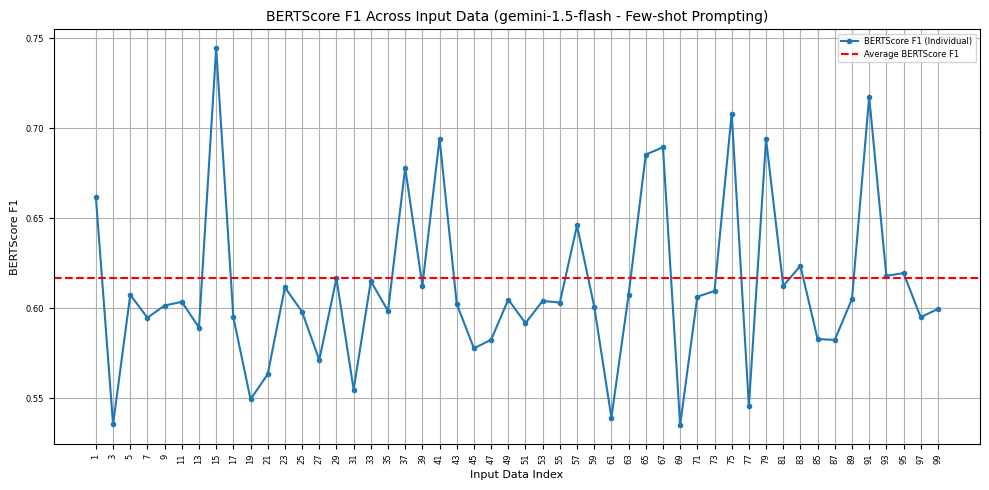

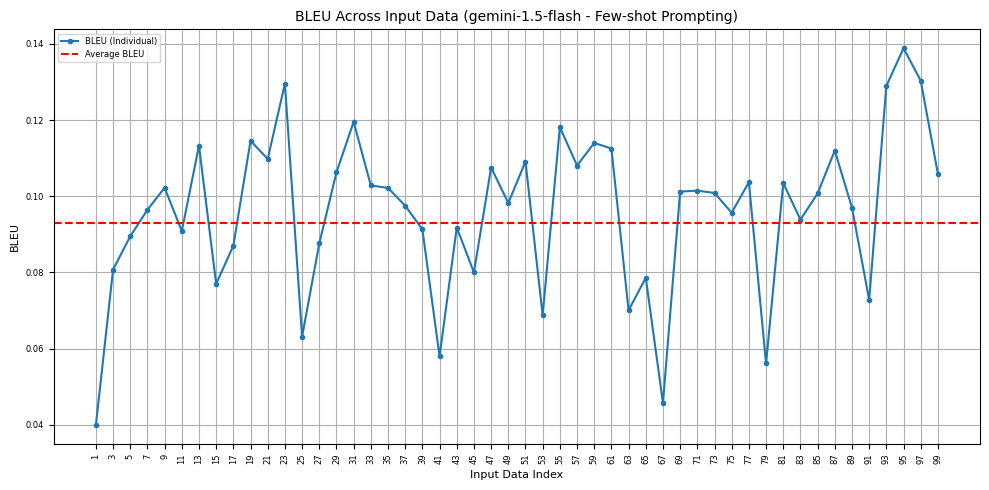

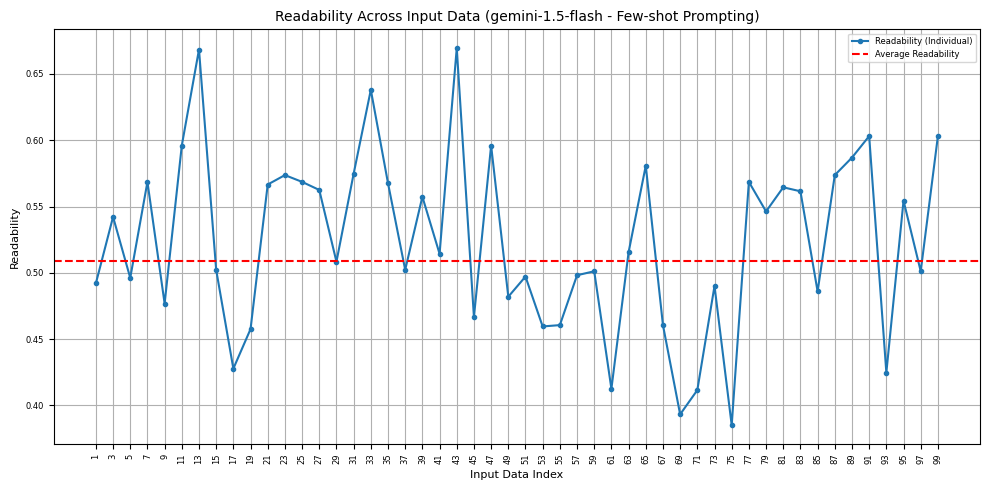

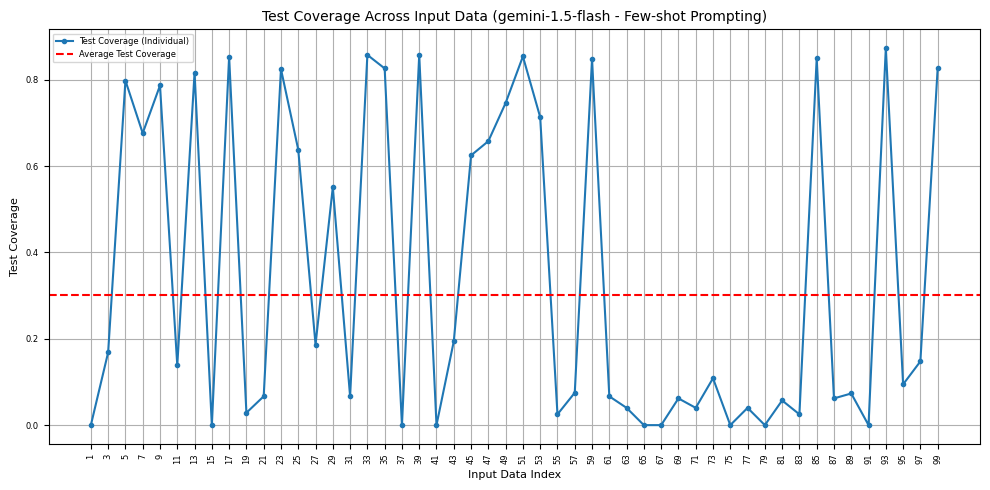

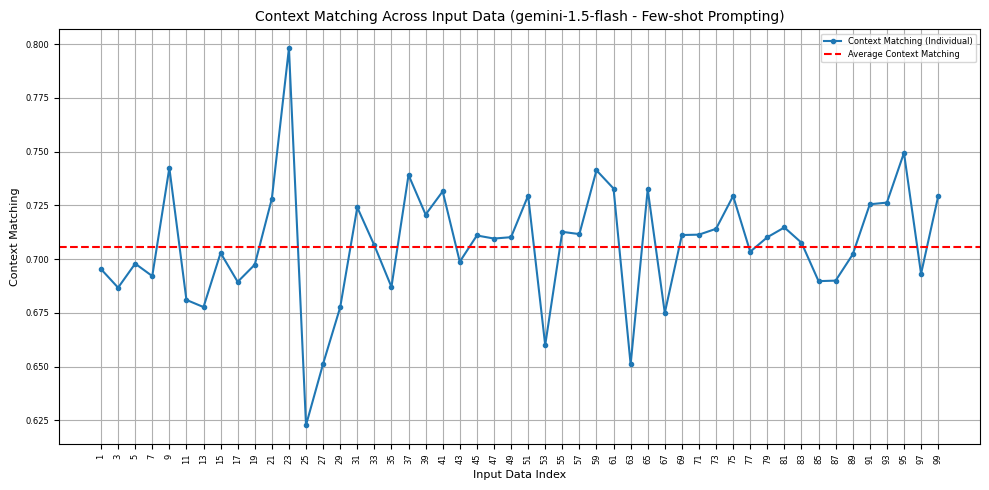

PDF 'NQA50-gemini-1.5-flash-Few-shot Prompting-2024-08-16-12-54-PM/Generated_Test_Cases_and_Reference_Input_Data.pdf' created and saved successfully.
Download your results: NQA50-gemini-1.5-flash-Few-shot Prompting-2024-08-16-12-54-PM.zip


/content/NQA50-gemini-1.5-flash-Few-shot Prompting-2024-08-16-12-54-PM.zip

In [2]:
import os
import json
import re
import pandas as pd
import random
import string
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score
import textstat
from rouge_score import rouge_scorer
from tabulate import tabulate
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Font
import shutil
from datetime import datetime
from collections import Counter
from fpdf import FPDF
import google.generativeai as genai

# Global variables for model name and technique name
MODEL_NAME = "gemini-1.5-flash"
TECHNIQUE_NAME = "Few-shot Prompting"

# Authenticate and configure the Gemini API
genai.configure(api_key='API_KEY')

# Initialize the Gemini model
model = genai.GenerativeModel(MODEL_NAME)

# Download the 'punkt' and 'stopwords' resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')

def generate_random_id(length=6):
    """Generate a random alphanumeric ID of given length."""
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=length))

def ordinal(n):
    """Helper function to convert an integer into its ordinal representation."""
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

def extract_field(data, field_variations):
    """Extract the value of a field from data using possible variations."""
    for field in field_variations:
        if field in data:
            return data[field]
    return None

def preprocess_json(json_data):
    """Process JSON data to extract and format relevant fields."""
    result = []
    entry_count = 1

    # Define field variations
    fields = {
        'project_name': ['project_name', 'Project Name', 'projectName', 'ProjectName'],
        'project_description': ['project_description', 'Project Description', 'projectDescription', 'ProjectDescription'],
        'feature_name': ['feature_name', 'Feature Name', 'featureName', 'FeatureName'],
        'feature_description': ['feature_description', 'Feature Description', 'featureDescription', 'FeatureDescription'],
        'userstory_title': ['userstory_title', 'User Story Title', 'userStoryTitle', 'UserStoryTitle'],
        'userstory_acceptance_criteria': ['userstory_acceptance_criteria', 'User Story Acceptance Criteria', 'userStoryAcceptanceCriteria', 'UserStoryAcceptanceCriteria'],
        'test_cases': ['test_cases', 'Test Cases', 'testCases', 'TestCases']
    }

    for entry in json_data:
        project_name = extract_field(entry, fields['project_name'])
        project_description = extract_field(entry, fields['project_description'])
        feature_name = extract_field(entry, fields['feature_name'])
        feature_description = extract_field(entry, fields['feature_description'])
        userstory_title = extract_field(entry, fields['userstory_title'])
        userstory_acceptance_criteria = extract_field(entry, fields['userstory_acceptance_criteria'])
        test_cases = extract_field(entry, fields['test_cases'])

        if not all([project_name, project_description, feature_name, feature_description, userstory_title, userstory_acceptance_criteria, test_cases]):
            continue

        result.append(f"Input Data - {entry_count}")
        result.append(f"1. Project Name - {project_name}")
        result.append(f"2. Project Description - {project_description}")
        result.append(f"3. Feature Name of Project - {feature_name}")
        result.append(f"4. Feature Description of Project - {feature_description}")
        result.append(f"5. User story of Feature - {userstory_title}")

        for i, criteria in enumerate(userstory_acceptance_criteria):
            result.append(f"{i+6}. {ordinal(i + 1)} Criteria of User Story - {criteria}")

        result.append("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        result.append(f"Reference Test Cases for Input Data - {entry_count}")
        result.append("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

        for j, tc in enumerate(test_cases):
            random_id = generate_random_id()
            result.append(f"Test Case No - {j + 1}")
            result.append(f"Test Case ID: {random_id}")
            result.append(f"Title: {tc['title']}")
            result.append(f"Description: {tc['test_case_description']}")
            result.append(f"Test Suite: {tc['test_suite']}")
            result.append(f"Priority: {tc['test_priority']}")
            result.append(f"Type: {tc['type_of_testing']}")

            result.append("Preconditions:")
            for idx, precondition in enumerate(tc['preconditions'], start=1):
                result.append(f"  {idx}. {precondition}")

            result.append(f"Test Data: {tc['test_data']}")

            result.append("Test Steps:")
            for idx, step in enumerate(tc['test_steps'], start=1):
                result.append(f"  {idx}. {step}")

            result.append("Postconditions:")
            for idx, postcondition in enumerate(tc['postconditions'], start=1):
                result.append(f"  {idx}. {postcondition}")

            result.append(f"Expected Result: {tc['expected_result']}")
            result.append(f"Severity: {tc['severity']}")
            result.append(f"Test Case Behaviour: {tc['test_case_behaviour']}")
            result.append("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

        result.append("======================================================================================================================================================================================================================================================================================================================================================================================================================")
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
        print(f"JSON Data Extracted Successfully for Input Data - {entry_count}")
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
        entry_count += 1

    return "\n".join(result)

def preprocess_csv(file_path):
    """Process CSV data to extract and format relevant fields."""
    data = pd.read_csv(file_path)

    if data.empty:
        return "CSV file is empty. Please provide valid data."

    results = []

    data['serial_number'].ffill(inplace=True)
    serial_groups = data.groupby('serial_number')

    for serial_number, group in serial_groups:
        if pd.isna(serial_number):
            continue

        row = group.iloc[0]
        project_name = row['project_name']
        project_description = row['project_description']
        feature_name = row['feature_name']
        feature_description = row['feature_description']
        userstory_title = row['userstory_title']

        result = []
        result.append(f"Input Data - {serial_number}")
        result.append(f"1. Project Name - {project_name}")
        result.append(f"2. Project Description - {project_description}")
        result.append(f"3. Feature Name of Project - {feature_name}")
        result.append(f"4. Feature Description of Project - {feature_description}")
        result.append(f"5. User story of Feature - {userstory_title}")

        for i in range(1, 6):
            criteria_column = f'userstory_acceptance_criteria__00{i}'
            if pd.notna(row[criteria_column]):
                result.append(f"{i + 5}. {ordinal(i)} Criteria of User Story - {row[criteria_column]}")

        result.append("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        result.append(f"Reference Test Cases for Serial Number - {serial_number}")
        result.append("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

        for idx, tc_row in group.iterrows():
            if pd.isna(tc_row['test_cases__test_case_id']):
                continue

            random_id = generate_random_id()
            result.append(f"Test Case No - {idx + 1}")
            result.append(f"Test Case ID: {random_id}")
            result.append(f"Title: {tc_row['test_cases__title']}")
            result.append(f"Description: {tc_row['test_cases__test_case_description']}")
            result.append(f"Test Suite: {tc_row['test_cases__test_suite']}")
            result.append(f"Priority: {tc_row['test_cases__test_priority']}")
            result.append(f"Type: {tc_row['test_cases__test_type']}")

            result.append("Preconditions:")
            preconditions = [tc_row[f'test_cases__preconditions__00{k}'] for k in range(1, 3) if pd.notna(tc_row[f'test_cases__preconditions__00{k}'])]
            for j, precondition in enumerate(preconditions, start=1):
                result.append(f"  {j}. {precondition}")

            result.append(f"Test Data: {tc_row['test_cases__test_data']}")

            result.append("Test Steps:")
            test_steps = [tc_row[f'test_cases__test_steps__00{k}'] for k in range(1, 6) if pd.notna(tc_row[f'test_cases__test_steps__00{k}'])]
            for j, step in enumerate(test_steps, start=1):
                result.append(f"  {j}. {step}")

            result.append("Postconditions:")
            postconditions = [tc_row[f'test_cases__postconditions__00{k}'] for k in range(1, 3) if pd.notna(tc_row[f'test_cases__postconditions__00{k}'])]
            for j, postcondition in enumerate(postconditions, start=1):
                result.append(f"  {j}. {postcondition}")

            result.append(f"Expected Result: {tc_row['test_cases__expected_result']}")
            result.append(f"Severity: {tc_row['test_cases__severity']}")
            result.append(f"Test Case Behaviour: {tc_row['test_cases__test_case_behaviour']}")
            result.append("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

        result.append("==================================================================================================================================================================================================================================================================================================")
        results.append("\n".join(result))
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f"CSV Data Extracted Successfully for Input Data - {serial_number}")
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return "\n".join(results)

def preprocess_data(file_path):
    """Determine the file type and preprocess the data accordingly."""
    if not os.path.exists(file_path):
        return "File not found. Please provide a valid file path."

    file_extension = os.path.splitext(file_path)[1].lower()

    if file_extension == '.json':
        print("Processing JSON file...")
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            return preprocess_json(json_data)
    elif file_extension == '.csv':
        print("Processing CSV file...")
        return preprocess_csv(file_path)
    else:
        return "Unsupported file format. Please provide a file in JSON or CSV format."

def create_prompt(preprocessed_data, entry_count):
    """
    Create a prompt using preprocessed data for test case generation.
    """

    # Define examples for few-shot prompting
    example_1 = """
    Input Data:

    Project Name: Trello
    Project Description: A web-based project management application that organizes projects into boards, lists, and cards.
    Feature Name: Card Assignment
    Feature Description: Allows users to assign cards to team members for task management.
    User Story Title: As a project manager, I want to assign cards to team members so that I can delegate tasks efficiently.
    Acceptance Criteria: The system must allow assigning cards to team members, The system must notify the assigned team member, The system must track the status of assigned cards.

    Test Case Creation Template:

    Test Case ID: fhgnR5
    Test Case Title: Verify that cards can be assigned to team members
    Test Case Description: Ensure that the system allows project managers to assign cards to team members.
    Test Suite: Card Assignment
    Test Priority: High
    Preconditions:
        - Project manager is logged in
        - Board is created
    Test Data: Card details
    Test Steps:
        1. Go to the board
        2. Select a card
        3. Click on the assign button
        4. Choose a team member
    Postconditions:
        - Card is assigned
    Expected Result: The system assigns the card to the selected team member and notifies them.
    Severity: Major
    Priority: High
    Type of Testing: Functional
    Test Case Behaviour: Positive
    """

    example_2 = """
    Input Data:

    Project Name: LinkedIn
    Project Description: A professional networking platform to connect, share, and learn with others.
    Feature Name: Profile Privacy Settings
    Feature Description: Allows users to control the visibility of their profile.
    User Story Title: As a user, I want to set my profile to private so that only my connections can view my information.
    Acceptance Criteria: The system must allow setting the profile to private, The system must restrict profile access to connections, The system must notify the user of the changes.

    Test Case Creation Template:

    Test Case ID: fdF8Ew
    Test Case Title: Verify that users can set their profile to private
    Test Case Description: Ensure that the system allows users to set their profile to private.
    Test Suite: Profile Privacy Settings
    Test Priority: Medium
    Preconditions:
        - User is logged in
    Test Data: User profile information
    Test Steps:
        1. Go to profile settings
        2. Select privacy settings
        3. Set profile to private
        4. Save changes
    Postconditions:
        - Profile privacy is updated
    Expected Result: The system sets the profile to private and notifies the user.
    Severity: Major
    Priority: Medium
    Type of Testing: Security
    Test Case Behaviour: Positive
    """

    example_3 = """
    Input Data:

    Project Name: Netflix
    Project Description: An online streaming service providing a wide variety of TV shows, movies, anime, documentaries, and more.
    Feature Name: Video Streaming Performance
    Feature Description: Ensures smooth streaming of video content without buffering.
    User Story Title: As a user, I want to stream videos without buffering so that I can enjoy uninterrupted content.
    Acceptance Criteria: The system must stream video content smoothly at various resolutions, The system must maintain a minimum buffer rate, The system must adjust the video quality based on network conditions.

    Test Case Creation Template:

    Test Case ID: Thf4w
    Test Case Title: Verify that the system streams videos smoothly at various resolutions
    Test Case Description: Ensure that the system streams video content smoothly without buffering at different resolutions.
    Test Suite: Video Streaming Performance
    Test Priority: High
    Preconditions:
        - User is logged in
        - Network connection is stable
    Test Data: Video content of various resolutions (e.g., 480p, 720p, 1080p, 4K)
    Test Steps:
        1. Select a video to stream
        2. Choose different resolutions
        3. Monitor the streaming performance
    Postconditions:
        - Video streams without buffering
    Expected Result: The system streams the video smoothly at the selected resolution without buffering, adjusts quality based on network conditions.
    Severity: Major
    Priority: High
    Type of Testing: Performance
    Test Case Behaviour: Positive
    """

    prompt = f"""
You are functioning as a Quality Assurance Engineer tasked with generating detailed test cases for a software project based on the following input data. Use the provided Test Case Creation Template to structure your test cases effectively. Generate test cases according to the exact number of acceptance criteria provided in the user story, ensuring each acceptance criterion is covered by at least one test case.

Note: In the following examples, only one test case is generated per input data. Your task is to generate exactly 5 test cases to cover all acceptance criteria (1 acceptance criteria = 1 Test case). Take these examples as references for formatting and structure.

Example 1:
{example_1}

Example 2:
{example_2}

Example 3:
{example_3}

Now, generate test cases for the following input data:
Instructions:

Project Context:

Project Name: {preprocessed_data['project_name']}
Project Description: {preprocessed_data['project_description']}
Feature Name: {preprocessed_data['feature_name']}
Feature Description: {preprocessed_data['feature_description']}
User Story Title: {preprocessed_data['userstory_title']}
Acceptance Criteria: {", ".join(preprocessed_data['acceptance_criteria'])}

Test Case Requirements:

Generate exactly 5 detailed test cases.
Ensure that each test case thoroughly covers one or more of the acceptance criteria.
Provide clear and concise descriptions for each test case, following best practices in test case writing.

Prompt Engineering Guidelines:

Contextual Relevance: Incorporate the project context and user story details into the test cases to ensure relevance.
Comprehensive Coverage: Each acceptance criterion must be tested, with no gaps. Include edge cases and negative scenarios where applicable.
Structured Response: Provide a template or structure to guide the response, ensuring consistency and completeness.
Quality Assurance Focus: Emphasize the importance of identifying potential defects and ensuring product quality through thorough testing.

Test Case Creation Template:

Test Case ID: (Provide a unique identifier for each test case)
Test Case Title: (Must start with "Verify that..." and clearly state the feature/function being tested)
Test Case Description: (A brief description of the test case, between 70-100 words)
Test Suite: (Name of the test suite or module)
Test Priority: (Priority level: High, Medium, Low)
Preconditions: (List any prerequisites before executing the test case, max 3 items, in unordered list)
Test Data: (Specify data required for execution; if none, state "No test data needed")
Test Steps: (List steps for executing the test case, min 3 to max 6)
Postconditions: (Any follow-up actions after test execution, max 3 items, in unordered list)
Expected Result: (Overall expected outcome of the test case)
Severity: (Blocker, Critical, Major, Minor, Trivial)
Type of Testing: (Unit Testing, Integration Testing, System Testing, Functional Testing, Non-Functional Testing, Regression Testing, Acceptance Testing, Performance Testing, Load Testing, Stress Testing, End-to-End Testing, Security Testing, Usability Testing, Compatibility Testing, Sanity Testing, Smoke Testing, Exploratory Testing, Ad-Hoc Testing, Data-Driven Testing, Cross-Browser Testing, API Testing, etc.)
Test Case Approach: (Positive, Negative, Destructive)

Objective:
Your objective is to create test cases that are thorough, cover all specified acceptance criteria, and contribute to a high-quality software product by identifying potential defects early in the development cycle.
    """

    print('-' * 150)
    print(f"Prompt created successfully for Input Data - {entry_count}!")
    print('-' * 150)

    return prompt

def generate_test_cases_with_gemini(input_text, entry_count, model_name=MODEL_NAME):
    """Generate test cases using Gemini's models."""
    response = model.generate_content(input_text)
    generated_test_cases = response.text
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f"Test Cases Generated Successfully for Input Data -{entry_count}!")
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(generated_test_cases)
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return generated_test_cases

def generate_test_cases_from_input_data(input_data):
    """Generate test cases from the input data and compute evaluation metrics."""
    entries = input_data.split("==================================================================================================================================================================================================================================================================================================")

    all_metrics = []
    generated_test_cases = []
    reference_test_cases = []
    individual_opis = []
    preprocessed_entries = []

    # Generate a random ID for the directory
    random_id = generate_random_id()
    plots_directory = f"images-{random_id}"
    create_plots_directory(plots_directory)

    for entry in entries:
        if not entry.strip():
            continue

        entry_count = extract_detail(entry, "Input Data - ")
        if not entry_count:
            continue

        project_name = extract_detail(entry, "Project Name - ")
        project_description = extract_detail(entry, "Project Description - ")
        feature_name = extract_detail(entry, "Feature Name of Project")
        feature_description = extract_detail(entry, "Feature Description of Project")
        user_story_title = extract_detail(entry, "User story of Feature")
        acceptance_criteria = [extract_detail(entry, f"{i + 6}.") for i in range(0, 5)]

        reference_test_case_text = entry.split("Reference Test Cases for Input Data - ")[-1]
        reference_test_cases.append(reference_test_case_text)

        preprocessed_data = {
            "project_name": project_name,
            "project_description": project_description,
            "feature_name": feature_name,
            "feature_description": feature_description,
            "userstory_title": user_story_title,
            "acceptance_criteria": acceptance_criteria
        }

        # Store the preprocessed data as a formatted string
        preprocessed_entry = "\n".join([f"{key.replace('_', ' ').capitalize()} - {value}" for key, value in preprocessed_data.items()])
        preprocessed_entries.append(preprocessed_entry)

        input_text = create_prompt(preprocessed_data, entry_count)
        generated_test_cases_by_llm = generate_test_cases_with_gemini(input_text, entry_count)

        generated_test_cases.append(generated_test_cases_by_llm)

        metrics = compute_evaluation_metrics(generated_test_cases_by_llm, reference_test_case_text, acceptance_criteria)
        all_metrics.append(metrics)

        individual_opi = calculate_overall_performance_index(metrics)
        individual_opis.append(individual_opi)

        print(f"Metrics for Input Data {entry_count}:")
        headers = ["Metric", "Value"]
        metrics_table = [[metric, value] for metric, value in metrics.items()]
        metrics_table.append(["Final OPI", individual_opi])
        print(tabulate(metrics_table, headers=headers, tablefmt="grid"))
        print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

    avg_metrics = calculate_average_metrics(all_metrics)
    overall_performance_index = sum(individual_opis) / len(individual_opis)  # Average OPI

    print("Average Metrics Across All Input Data:")
    headers = ["Metric", "Average Value"]
    avg_metrics_table = [[metric, value] for metric, value in avg_metrics.items()]
    print(tabulate(avg_metrics_table, headers=headers, tablefmt="grid"))
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("Final Average Metrics Across All Input Data:")
    print(avg_metrics)
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Overall Performance Index: {overall_performance_index:.4f}")
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")

    # Save metrics to Excel
    excel_filename = save_metrics_to_excel(all_metrics, avg_metrics, individual_opis, overall_performance_index, MODEL_NAME)

    # Generate and save plots with different sizes
    plot_sizes = [(8, 4), (10, 5)]
    for size in plot_sizes:
        plot_metrics(all_metrics, avg_metrics, plots_directory, size)
        plot_all_metrics_in_one_image(all_metrics, plots_directory, size)
        plot_combined_metrics_with_opi(all_metrics, individual_opis, avg_metrics, overall_performance_index, plots_directory, size)
        plot_final_opi(individual_opis, overall_performance_index, plots_directory, size)
        for metric in all_metrics[0].keys():
            plot_individual_metric(all_metrics, metric, avg_metrics[metric], plots_directory, size)

    # Generate a random 5-digit alphanumeric ID
    folder_random_id = generate_random_id(5)

    # Create the final folder name based on model, technique, date, and time
    current_datetime = datetime.now().strftime("%Y-%m-%d-%I-%M-%p")
    final_folder_name = f"{folder_random_id}-{MODEL_NAME}-{TECHNIQUE_NAME}-{current_datetime}"

    os.makedirs(final_folder_name, exist_ok=True)

    # Move the images directory and the Excel file to the final folder
    shutil.move(plots_directory, os.path.join(final_folder_name, plots_directory))
    shutil.move(excel_filename, os.path.join(final_folder_name, excel_filename))

    # Create and save the PDF of generated test cases
    pdf_file_name = save_test_cases_to_pdf(generated_test_cases, reference_test_cases, preprocessed_entries, final_folder_name)

    # Zip the final folder
    shutil.make_archive(final_folder_name, 'zip', final_folder_name)

    # If running in a web environment like Jupyter, provide a download link
    try:
        from IPython.display import FileLink
        print(f"Download your results: {final_folder_name}.zip")
        display(FileLink(f"{final_folder_name}.zip"))
    except ImportError:
        print(f"Results saved in folder: {final_folder_name}")

    return generated_test_cases, reference_test_cases, avg_metrics

def compute_evaluation_metrics(generated_text, reference, acceptance_criteria):
    """Compute various evaluation metrics for the generated test cases."""
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
    scores = scorer.score(reference, generated_text)

    rouge_scores = {
        "ROUGE-1": scores['rouge1'].fmeasure,
        "ROUGE-2": scores['rouge2'].fmeasure,
        "ROUGE-L": scores['rougeL'].fmeasure,
        "ROUGE-Lsum": scores['rougeLsum'].fmeasure
    }

    P, R, F1 = score([generated_text], [reference], lang="en", model_type='bert-base-uncased')
    bert_scores = {
        "BERTScore Precision": P.mean().item(),
        "BERTScore Recall": R.mean().item(),
        "BERTScore F1": F1.mean().item()
    }

    reference_tokens = [nltk.word_tokenize(reference)]
    generated_tokens = nltk.word_tokenize(generated_text)
    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu(reference_tokens, generated_tokens, smoothing_function=smoothie)

    readability_score = textstat.flesch_reading_ease(generated_text) / 100  # Normalize to 0-1

    context_matching_score = compute_context_matching(reference, generated_text)

    coverage = compute_test_coverage(generated_text, acceptance_criteria)

    return {
        "ROUGE-1": rouge_scores["ROUGE-1"],
        "ROUGE-2": rouge_scores["ROUGE-2"],
        "ROUGE-L": rouge_scores["ROUGE-L"],
        "ROUGE-Lsum": rouge_scores["ROUGE-Lsum"],
        "BERTScore Precision": bert_scores["BERTScore Precision"],
        "BERTScore Recall": bert_scores["BERTScore Recall"],
        "BERTScore F1": bert_scores["BERTScore F1"],
        "BLEU": bleu_score,
        "Readability": readability_score,
        "Test Coverage": coverage,
        "Context Matching": context_matching_score
    }

def compute_context_matching(reference, generated_text):
    """Compute the context matching score between reference and generated text."""
    reference_phrases = reference.split()
    generated_phrases = generated_text.split()
    matched_phrases = [phrase for phrase in reference_phrases if phrase in generated_phrases]
    matching_score = len(matched_phrases) / len(reference_phrases)
    return matching_score

def extract_test_case_titles(generated_text):
    """Extract test case titles from the generated text."""
    title_pattern = re.compile(r"Test Case Title:\s*(.*)")
    return title_pattern.findall(generated_text)

def tokenize_and_remove_stopwords(text):
    """Tokenize the text and remove stopwords."""
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = nltk.word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return filtered_words

def compute_similarity_score(text1, text2):
    """Compute the similarity score between two texts based on common words."""
    words1 = Counter(tokenize_and_remove_stopwords(text1))
    words2 = Counter(tokenize_and_remove_stopwords(text2))
    common_words = sum((words1 & words2).values())
    total_words = max(len(words1), len(words2))
    return common_words / total_words if total_words > 0 else 0

def compute_test_coverage(generated_text, acceptance_criteria):
    """Compute the test coverage score based on acceptance criteria."""
    # Extract test case titles from the generated text
    titles = extract_test_case_titles(generated_text)

    # Compare each acceptance criteria with the corresponding title
    scores = []
    for i, criteria in enumerate(acceptance_criteria):
        if i < len(titles):
            title = titles[i]
            score = compute_similarity_score(title, criteria)
            scores.append(score)

    # Calculate the average coverage score
    coverage = sum(scores) / len(scores) if scores else 0
    return coverage

def calculate_average_metrics(all_metrics):
    """Calculate the average metrics across all input data."""
    metrics_df = pd.DataFrame(all_metrics)
    avg_metrics = metrics_df.mean().to_dict()
    return avg_metrics

def calculate_overall_performance_index(metrics, weights=None):
    """Calculate the overall performance index from the given metrics."""
    if weights is None:
        weights = {
            'ROUGE-1': 0.09,
            'ROUGE-2': 0.09,
            'ROUGE-L': 0.14,
            'ROUGE-Lsum': 0.09,
            'BERTScore Precision': 0.09,
            'BERTScore Recall': 0.14,
            'BERTScore F1': 0.09,
            'BLEU': 0.04,
            'Readability': 0.04,
            'Test Coverage': 0.1,
            'Context Matching': 0.1
        }

    normalized_metrics = {metric: metrics[metric] / max(metrics.values()) for metric in metrics.keys()}
    overall_score = sum(normalized_metrics[metric] * weight for metric, weight in weights.items())
    return overall_score

def extract_detail(text, keyword):
    """Extract specific details from text based on a given keyword."""
    lines = text.split("\n")
    for line in lines:
        if keyword in line:
            detail = line.split("- ")[-1].strip()
            # Attempt to convert to integer, handling potential float strings
            try:
                return int(float(detail))  # Convert to float first, then to integer
            except ValueError:
                return detail  # Return the original string if not convertible
    return ''

def create_plots_directory(directory):
    """Create a directory for saving plots."""
    if not os.path.exists(directory):
        os.makedirs(directory)

def plot_metrics(all_metrics, avg_metrics, directory, fig_size):
    """Plot the metrics for analysis with subsampling on the X-axis."""
    metrics_df = pd.DataFrame(all_metrics)

    # List of metrics to plot
    rouge_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
    bert_metrics = ['BERTScore Precision', 'BERTScore Recall', 'BERTScore F1']
    other_metrics = ['BLEU', 'Readability', 'Test Coverage', 'Context Matching']

    # Calculate the number of input data indices
    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)

    # Generate a list of indices starting from 1 with the calculated step size
    x_indices = list(range(1, num_indices + 1, step_size))

    # Plot each metric individually
    for metric in rouge_metrics + bert_metrics + other_metrics:
        plt.figure(figsize=fig_size)
        plt.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=f'{metric} (Individual)')
        plt.axhline(y=avg_metrics[metric], color='r', linestyle='--', label=f'Average {metric}')
        plt.title(f'{metric} Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
        plt.xlabel('Input Data Index', fontsize=8)
        plt.ylabel(f'{metric}', fontsize=8)
        plt.xticks(x_indices, rotation=90, fontsize=6)
        plt.yticks(fontsize=6)
        plt.legend(fontsize=6)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(directory, f"{metric}_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
        plt.show()

    print(f"All metrics plotted and saved in {directory}")

def plot_all_metrics_in_one_image(all_metrics, directory, fig_size):
    """Plot all 11 metrics in one image, excluding final OPI."""
    metrics_df = pd.DataFrame(all_metrics)

    # List of metrics to plot
    all_metrics_list = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum',
                        'BERTScore Precision', 'BERTScore Recall', 'BERTScore F1',
                        'BLEU', 'Readability', 'Test Coverage', 'Context Matching']

    # Calculate the number of input data indices
    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)

    # Generate a list of indices starting from 1 with the calculated step size
    x_indices = list(range(1, num_indices + 1, step_size))

    # Plot all metrics in one image
    fig, ax = plt.subplots(figsize=fig_size)  # Use the provided figure size
    for metric in all_metrics_list:
        ax.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=metric)
    ax.set_title(f'All 11 Metrics Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    ax.set_xlabel('Input Data Index', fontsize=8)
    ax.set_ylabel('Metric Values', fontsize=8)
    ax.legend(loc='best', fontsize=6)
    ax.grid(True)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"All_Metrics_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()


def plot_combined_metrics_with_opi(all_metrics, individual_opis, avg_metrics, overall_performance_index, directory, fig_size):
    """Plot all metrics and OPI together in one image with subsampling."""
    metrics_df = pd.DataFrame(all_metrics)

    # List of metrics to plot
    all_metrics_list = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum',
                        'BERTScore Precision', 'BERTScore Recall', 'BERTScore F1',
                        'BLEU', 'Readability', 'Test Coverage', 'Context Matching']

    # Calculate the number of input data indices
    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)

    # Generate a list of indices starting from 1 with the calculated step size
    x_indices = list(range(1, num_indices + 1, step_size))

    # Plot all metrics and OPI in one image
    fig, ax = plt.subplots(figsize=fig_size)  # Use the provided figure size
    for metric in all_metrics_list:
        ax.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=metric)
    ax.plot(x_indices, individual_opis[::step_size], marker='o', color='black', label='OPI (Individual)', linewidth=2)
    ax.axhline(y=overall_performance_index, color='red', linestyle='--', label=f'Average OPI: {overall_performance_index:.4f}', linewidth=2)
    ax.set_title(f'All Metrics and OPI Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    ax.set_xlabel('Input Data Index', fontsize=8)
    ax.set_ylabel('Metric Values', fontsize=8)
    ax.legend(loc='best', fontsize=6)
    ax.grid(True)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"Combined_Metrics_and_OPI_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()

def plot_final_opi(individual_opis, overall_performance_index, directory, fig_size):
    """Plot the final OPI for each input data and the average OPI."""
    num_inputs = len(individual_opis)
    step_size = determine_step_size(num_inputs)

    x_indices = list(range(1, num_inputs + 1, step_size))

    plt.figure(figsize=fig_size)
    plt.plot(x_indices, individual_opis[::step_size], marker='o', markersize=3, label='Individual OPI')
    plt.axhline(y=overall_performance_index, color='red', linestyle='--', label=f'Average OPI: {overall_performance_index:.4f}')
    plt.title(f'Final OPI for Each Input Data and Average OPI ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    plt.xlabel('Input Data Index', fontsize=10)
    plt.ylabel('Overall Performance Index (OPI)', fontsize=10)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.legend(fontsize=6)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"Final_OPI_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()

def plot_individual_metric(all_metrics, metric, avg_metric, directory, fig_size):
    """Plot an individual metric with average line."""
    metrics_df = pd.DataFrame(all_metrics)

    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)
    x_indices = list(range(1, num_indices + 1, step_size))

    plt.figure(figsize=fig_size)
    plt.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=f'{metric} (Individual)')
    plt.axhline(y=avg_metric, color='r', linestyle='--', label=f'Average {metric}')
    plt.title(f'{metric} Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    plt.xlabel('Input Data Index', fontsize=8)
    plt.ylabel(f'{metric}', fontsize=8)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.legend(fontsize=6)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"{metric}_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()

def determine_step_size(num_indices):
    """Determine step size for x-axis labels based on number of data points."""
    if num_indices <= 50:
        return 1
    elif num_indices <= 100:
        return 2
    elif num_indices <= 300:
        return 5
    elif num_indices <= 500:
        return 10
    else:
        return max(1, num_indices // 100)

def save_metrics_to_excel(all_metrics, avg_metrics, individual_opis, overall_performance_index, model_name):
    """Save all metrics, average metrics, individual OPIs, and average OPI to an Excel file."""
    workbook = Workbook()
    sheet_title = f"Zero-shot Prompting - {model_name}"
    sheet = workbook.active
    sheet.title = sheet_title

    # Define header
    header = ["Input Data No."] + list(all_metrics[0].keys()) + ["Individual OPI"]
    sheet.append(header)

    # Apply formatting to header
    header_fill = PatternFill(start_color="ADD8E6", end_color="ADD8E6", fill_type="solid")
    header_font = Font(bold=True)
    for cell in sheet[1]:
        cell.fill = header_fill
        cell.font = header_font

    # Add data
    for i, (metrics, opi) in enumerate(zip(all_metrics, individual_opis), start=1):
        row = [i] + list(metrics.values()) + [opi]
        sheet.append(row)

    # Add average metrics and average OPI
    avg_row = ["Average"] + list(avg_metrics.values()) + [overall_performance_index]
    sheet.append(avg_row)

    # Apply formatting to average row
    avg_fill = PatternFill(start_color="FFFF99", end_color="FFFF99", fill_type="solid")
    avg_font = Font(bold=True)
    for cell in sheet[len(all_metrics) + 2]:
        cell.fill = avg_fill
        cell.font = avg_font

    # Save the workbook with a random ID in the filename
    random_id = generate_random_id()
    file_name = f"metrics_{random_id}.xlsx"
    workbook.save(file_name)
    print(f"Excel sheet '{file_name}' created and downloaded successfully.")
    return file_name

def save_test_cases_to_pdf(generated_test_cases, reference_test_cases, preprocessed_data, final_folder_name):
    """
    Save the generated test cases, reference input data, and preprocessed data into a PDF file.
    The PDF content is formatted professionally with proper spacing and font styles.
    """
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Set title font
    pdf.set_font("Times", 'B', 14)
    pdf.set_text_color(0, 0, 0)

    # Title
    title_text = f"Generated Test Cases via {MODEL_NAME} LLM Model and {TECHNIQUE_NAME} Technique"
    pdf.cell(0, 10, title_text, ln=True, align='C')
    pdf.line(10, 26, 200, 26)  # Underline
    pdf.ln(10)  # Add some vertical space

    # Loop through the generated test cases, reference test cases, and preprocessed data
    for i, (gen_case, ref_case, pre_data) in enumerate(zip(generated_test_cases, reference_test_cases, preprocessed_data), start=1):
        # Section Header
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, f"Data - {i}", ln=True, align='L')
        pdf.ln(5)

        # Preprocessed Data
        pdf.set_font("Times", '', 12)
        for line in pre_data.splitlines():
            if " - " in line:
                key, value = line.split(" - ", 1)
                pdf.set_font("Times", 'B', 12)
                pdf.multi_cell(0, 10, f"{key} - ", align='L')
                pdf.set_font("Times", '', 12)
                pdf.multi_cell(0, 10, value, align='L')
            else:
                pdf.multi_cell(0, 10, line, align='L')
        pdf.ln(5)

        # Generated Test Cases Header
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, "Generated Test Cases:", ln=True, align='L')
        pdf.ln(5)

        # Generated Test Cases Content
        pdf.set_font("Times", '', 12)
        pdf.multi_cell(0, 10, gen_case.encode('latin1', 'replace').decode('latin1'), align='L')
        pdf.ln(5)

        # Divider for each data section
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, "-" * 100, ln=True, align='C')
        pdf.ln(5)

    # Save the PDF directly to the final folder
    pdf_file_name = os.path.join(final_folder_name, "Generated_Test_Cases_and_Reference_Input_Data.pdf")
    pdf.output(pdf_file_name)
    print(f"PDF '{pdf_file_name}' created and saved successfully.")

    return pdf_file_name

# Example usage with the extracted input data from the previous step
file_path = 'data100.json'  # Replace 'datas.json' with the path to your JSON or CSV file
input_data = preprocess_data(file_path)
generated_test_cases, reference_test_cases, avg_metrics = generate_test_cases_from_input_data(input_data)
